In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1st Question
import numpy as np

def activation(x):
    return 1 if x > 0 else 0

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 0, 0, 1])
weights = np.array([0.5, 0.5])
learning_rate = 0.1
b=0.0

def perceptron(x,w,b):
  v=np.dot(X[i], weights)+b
  output = activation(v)
  return output



for epoch in range(10):
    print(f"Epoch {epoch+1}:")
    for i in range(len(X)):
      output=perceptron(X[i],weights,b)
      error = y[i] - output
      weights += learning_rate * error * X[i]
      b+= learning_rate * error
      print(f" Input: {X[i]} Target: {y[i]} Predicted: {output} Weights: {weights}")

Epoch 1:
 Input: [0 0] Target: 0 Predicted: 0 Weights: [0.5 0.5]
 Input: [0 1] Target: 0 Predicted: 1 Weights: [0.5 0.4]
 Input: [1 0] Target: 0 Predicted: 1 Weights: [0.4 0.4]
 Input: [1 1] Target: 1 Predicted: 1 Weights: [0.4 0.4]
Epoch 2:
 Input: [0 0] Target: 0 Predicted: 0 Weights: [0.4 0.4]
 Input: [0 1] Target: 0 Predicted: 1 Weights: [0.4 0.3]
 Input: [1 0] Target: 0 Predicted: 1 Weights: [0.3 0.3]
 Input: [1 1] Target: 1 Predicted: 1 Weights: [0.3 0.3]
Epoch 3:
 Input: [0 0] Target: 0 Predicted: 0 Weights: [0.3 0.3]
 Input: [0 1] Target: 0 Predicted: 0 Weights: [0.3 0.3]
 Input: [1 0] Target: 0 Predicted: 0 Weights: [0.3 0.3]
 Input: [1 1] Target: 1 Predicted: 1 Weights: [0.3 0.3]
Epoch 4:
 Input: [0 0] Target: 0 Predicted: 0 Weights: [0.3 0.3]
 Input: [0 1] Target: 0 Predicted: 0 Weights: [0.3 0.3]
 Input: [1 0] Target: 0 Predicted: 0 Weights: [0.3 0.3]
 Input: [1 1] Target: 1 Predicted: 1 Weights: [0.3 0.3]
Epoch 5:
 Input: [0 0] Target: 0 Predicted: 0 Weights: [0.3 0.3]
 In

In [14]:
# 2nd question
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split

mlp = MLPClassifier(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam', 'sgd'],
    'max_iter': [200, 500],
}

grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

mlp_best = MLPClassifier(**best_params, random_state=42)
mlp_best.fit(X_train, y_train)

accuracy = mlp_best.score(X_test, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [16]:
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 500, 'solver': 'adam'}
Best Accuracy: 0.975
Test Accuracy: 0.9666666666666667


Text(0, 0.5, 'petal width (cm)')

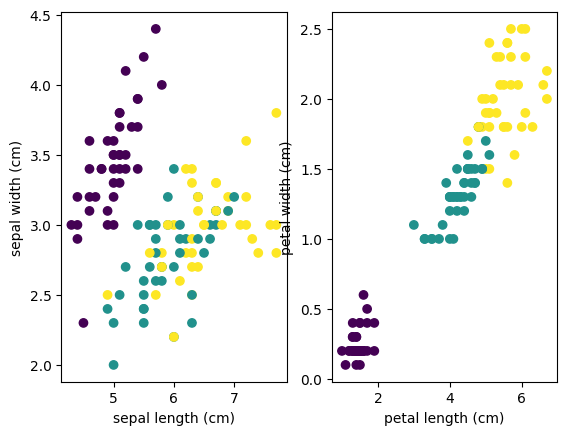

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm.viridis)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(X_train[:,2],X_train[:,3],c=y_train,cmap=cm.viridis)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])

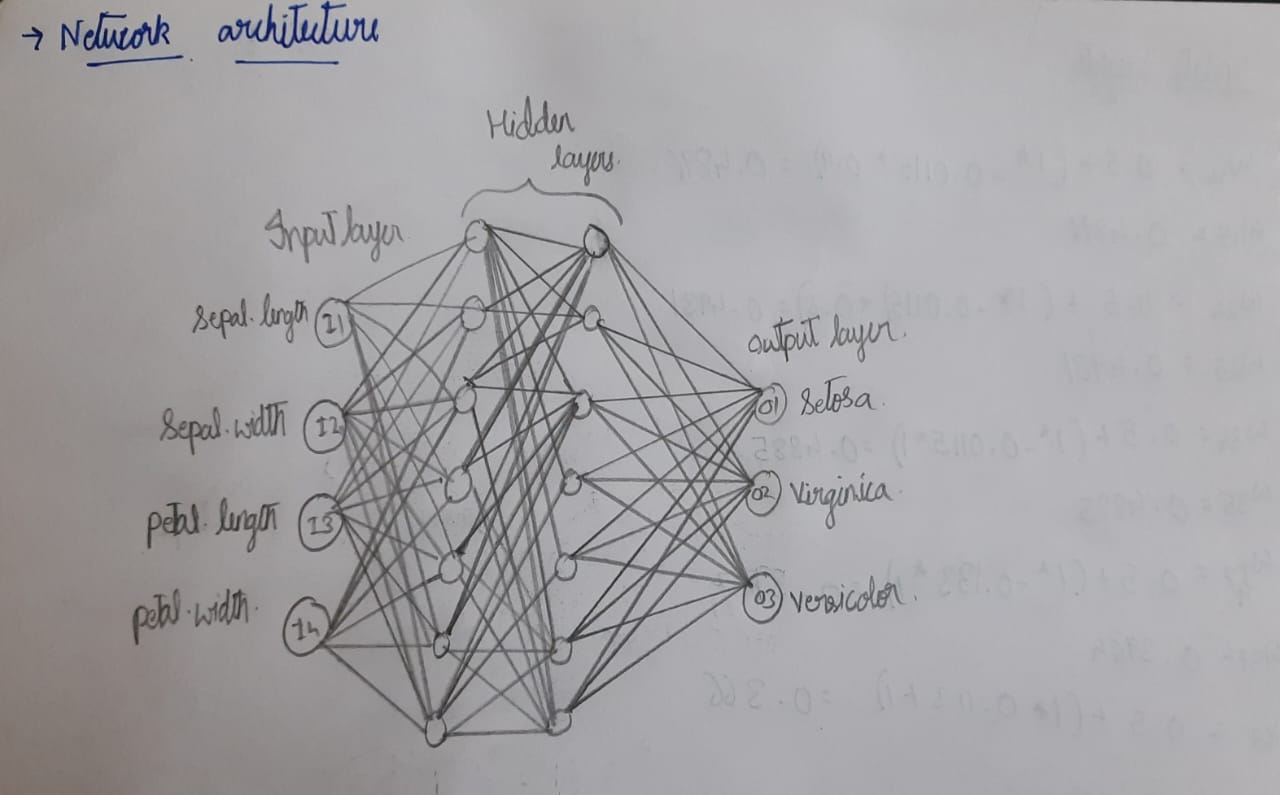